In [8]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
image2=cv2.imread('/Users/sai/Projects/training/image_processing/pexels-m-shah-2155040128-33516570.jpg',cv2.IMREAD_GRAYSCALE)

/var/folders/qm/bpjw8zwx3rlgc9nq0xqchfr40000gn/T/ipykernel_42231/2649338148.py:12: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(image))
/var/folders/qm/bpjw8zwx3rlgc9nq0xqchfr40000gn/T/ipykernel_42231/2649338148.py:12: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(image))
/var/folders/qm/bpjw8zwx3rlgc9nq0xqchfr40000gn/T/ipykernel_42231/2649338148.py:13: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * (np.log(image + 1))
/var/folders/qm/bpjw8zwx3rlgc9nq0xqchfr40000gn/T/ipykernel_42231/2649338148.py:13: RuntimeWarning: invalid value encountered in multiply
  log_transformed = c * (np.log(image + 1))
/var/folders/qm/bpjw8zwx3rlgc9nq0xqchfr40000gn/T/ipykernel_42231/2649338148.py:14: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.array(log_transformed, dtype=np.uint8)


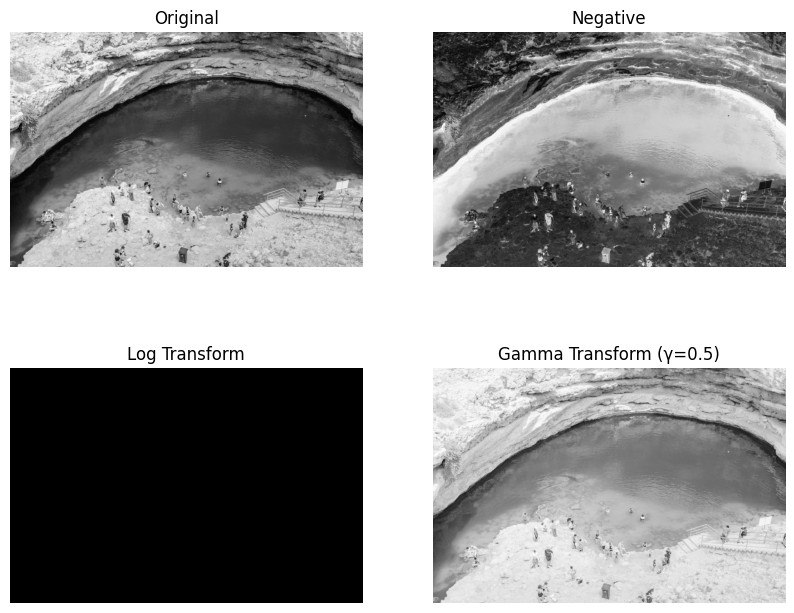

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load sample image (grayscale for intensity transformations)
image = cv2.imread("/Users/sai/Projects/training/image_processing/pexels-m-shah-2155040128-33516570.jpg", cv2.IMREAD_GRAYSCALE)

# 1. Negative Transformation
negative = 255 - image

# 2. Log Transformation
c = 255 / np.log(1 + np.max(image))
log_transformed = c * (np.log(image + 1))
log_transformed = np.array(log_transformed, dtype=np.uint8)

# 3. Power-Law (Gamma) Transformation
gamma = 0.5
gamma_corrected = np.array(255 * (image / 255) ** gamma, dtype=np.uint8)

# Plot results
titles = ['Original', 'Negative', 'Log Transform', 'Gamma Transform (γ=0.5)']
images = [image, negative, log_transformed, gamma_corrected]

plt.figure(figsize=(10,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


In [28]:
negative

array([[ 10,  22,  30, ...,  46,  23,  40],
       [ 19,  25,  27, ...,  69,  50,  31],
       [ 36,  36,  32, ...,  79,  80,  53],
       ...,
       [185, 185, 186, ...,  55,  50,  55],
       [183, 187, 189, ...,  69,  60,  63],
       [181, 186, 189, ...,  61,  50,  55]],
      shape=(853, 1280), dtype=uint8)

/var/folders/qm/bpjw8zwx3rlgc9nq0xqchfr40000gn/T/ipykernel_42231/1815998895.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(image.ravel(), 256, [0,256])


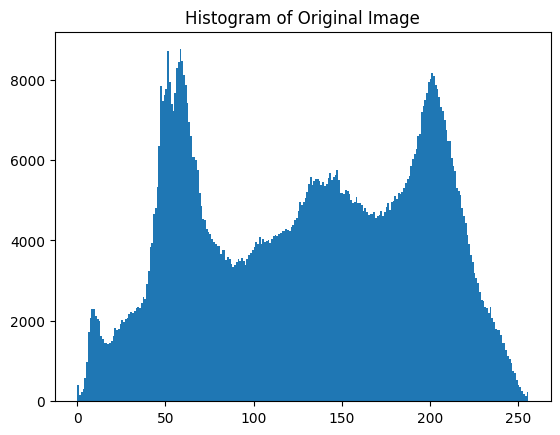

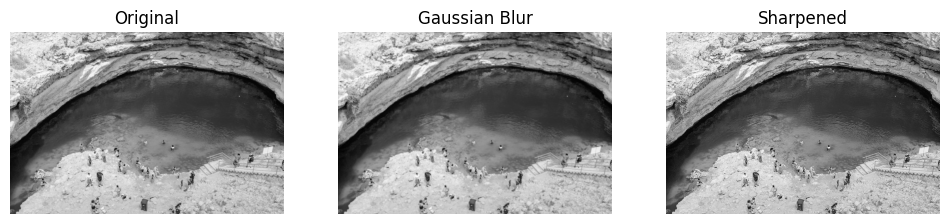

In [30]:
plt.figure()
plt.hist(image.ravel(), 256, [0,256])
plt.title("Histogram of Original Image")
plt.show()

# Apply spatial filters
blur = cv2.GaussianBlur(image, (5,5), 0)  # Smoothing
sharpening_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])  # Sharpening
sharpened = cv2.filter2D(image, -1, sharpening_kernel)

# Plot results
titles = ['Original', 'Gaussian Blur', 'Sharpened']
images = [image, blur, sharpened]

plt.figure(figsize=(12,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

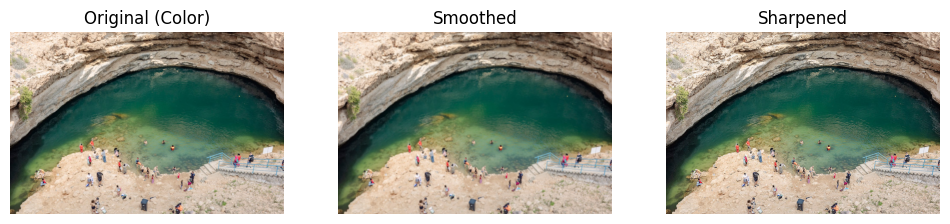

In [37]:
# Load color image
image_color = cv2.imread("/Users/sai/Projects/training/image_processing/pexels-m-shah-2155040128-33516570.jpg")
image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

# Smoothing (using Gaussian Blur)
smoothed = cv2.GaussianBlur(image_color, (7,7), 0)

# Sharpening filter
kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharpened = cv2.filter2D(image_color, -1, kernel)

# Plot results
titles = ['Original (Color)', 'Smoothed', 'Sharpened']
images = [image_color, smoothed, sharpened]

plt.figure(figsize=(12,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.show()


In [38]:
image

array([[245, 233, 225, ..., 209, 232, 215],
       [236, 230, 228, ..., 186, 205, 224],
       [219, 219, 223, ..., 176, 175, 202],
       ...,
       [ 70,  70,  69, ..., 200, 205, 200],
       [ 72,  68,  66, ..., 186, 195, 192],
       [ 74,  69,  66, ..., 194, 205, 200]],
      shape=(853, 1280), dtype=uint8)

ravel converts multidimensional to one dimensional array

In [39]:
image.ravel()

array([245, 233, 225, ..., 194, 205, 200], shape=(1091840,), dtype=uint8)